# Description

See description in notebook `10_00-spectral_clustering...`.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 100000

In [6]:
CLUSTERING_METHOD_NAME = "DeltaSpectralClustering"

In [7]:
# output dir for this notebook
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering')

# Load data

In [8]:
INPUT_SUBSET = "pca"

In [9]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [10]:
DR_OPTIONS = {
    "n_components": 50,
    "svd_solver": "full",
    "random_state": 0,
}

In [11]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/pca/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

'pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full'

In [12]:
data = pd.read_pickle(input_filepath)

In [13]:
data.shape

(3752, 50)

In [14]:
data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,0.805216,-0.865390,0.699480,-0.065976,0.999617,-0.418645,1.993288,-0.346875,-1.522978,-2.382791,...,0.777932,0.507896,0.693668,1.024260,0.189606,-1.661826,0.281234,-0.096792,-0.339508,0.041431
100002_raw-Energy,0.588507,-1.491772,1.756340,-3.593295,2.100607,0.364910,1.254815,2.028484,-0.357607,-4.832726,...,-0.780215,-2.285033,-0.607663,-2.727018,1.711667,-0.535025,2.342068,0.197519,1.636996,-1.114410
100003_raw-Protein,1.910160,-1.873687,1.876677,-3.832557,1.240704,2.941375,2.293978,0.802473,0.665380,-4.375319,...,-0.547161,0.514721,0.034145,-0.423218,-0.324825,-0.000958,0.294579,1.186937,0.226722,0.169931
100004_raw-Fat,0.750799,-0.294733,1.317710,-1.346081,2.006403,0.533509,-0.752916,0.937515,-0.572191,-2.451612,...,0.060359,-0.878309,-0.774943,-1.914890,2.559763,1.547267,1.851110,-0.310431,3.495624,-1.595785
100005_raw-Carbohydrate,-0.530044,-0.007398,0.611418,-3.604094,2.227872,0.051271,0.001135,2.303819,-0.387759,-5.686184,...,-1.110273,-3.032541,-1.223873,-0.945626,2.150276,-1.798716,2.526678,0.716987,0.300972,-0.893854


In [15]:
traits = data.index.tolist()

In [16]:
len(traits)

3752

# Load coassociation matrix (ensemble)

In [17]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "ensemble_coassoc_matrix.npy").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering/ensemble_coassoc_matrix.npy')

In [18]:
coassoc_matrix = np.load(input_file)

In [19]:
coassoc_matrix = pd.DataFrame(
    data=coassoc_matrix,
    index=traits,
    columns=traits,
)

In [20]:
coassoc_matrix.shape

(3752, 3752)

In [21]:
coassoc_matrix.head()

,100001_raw-Food_weight,100002_raw-Energy,100003_raw-Protein,100004_raw-Fat,100005_raw-Carbohydrate,100006_raw-Saturated_fat,100007_raw-Polyunsaturated_fat,100008_raw-Total_sugars,100009_raw-Englyst_dietary_fibre,100010-Portion_size,...,visual impairment,vitiligo,vitreous body disease,vocal cord polyp,voice disorders,wellbeing measurement AND family relationship,wheezing,whooping cough,worry measurement,wrist fracture
100001_raw-Food_weight,0.000000,0.314971,0.328000,0.367543,0.341257,0.369347,0.361951,0.354124,0.330439,0.364853,...,0.461101,0.443161,0.440617,0.442608,0.486303,0.359294,0.430441,0.479511,0.411417,0.644333
100002_raw-Energy,0.314971,0.000000,0.041534,0.076677,0.049064,0.078977,0.092762,0.068478,0.066438,0.629198,...,0.678784,0.683862,0.661792,0.686445,0.685388,0.616157,0.670675,0.678686,0.648605,0.674960
100003_raw-Protein,0.328000,0.041534,0.000000,0.102465,0.058421,0.104771,0.117041,0.090390,0.074201,0.639022,...,0.678326,0.688199,0.673446,0.686216,0.670548,0.614560,0.664662,0.664080,0.642204,0.677014
100004_raw-Fat,0.367543,0.076677,0.102465,0.000000,0.052031,0.005250,0.049015,0.029674,0.107763,0.603838,...,0.652949,0.645971,0.627514,0.654724,0.648858,0.667503,0.711378,0.652214,0.692273,0.646656
100005_raw-Carbohydrate,0.341257,0.049064,0.058421,0.052031,0.000000,0.055010,0.070316,0.036293,0.097489,0.612063,...,0.661866,0.668112,0.642139,0.667047,0.665525,0.646965,0.701203,0.659288,0.679241,0.653047


In [22]:
dist_matrix = coassoc_matrix

# Clustering

In [23]:
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
)

## More exhaustive test

Here I run some test across several `k` and `delta` values; then I check how results perform with different clustering quality measures.

In [24]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_RANGE"] = [
    2,
    4,
    6,
    8,
    10,
    12,
    14,
    16,
    18,
    20,
    25,
    30,
    35,
    40,
    50,
    60,
]
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10
CLUSTERING_OPTIONS["DELTAS"] = [
    5.00,
    2.00,
    1.00,
    0.90,
    0.75,
    0.50,
    0.30,
    0.25,
    0.20,
]

display(CLUSTERING_OPTIONS)

{'K_RANGE': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 50, 60],
 'N_REPS_PER_K': 5,
 'KMEANS_N_INIT': 10,
 'DELTAS': [5.0, 2.0, 1.0, 0.9, 0.75, 0.5, 0.3, 0.25, 0.2]}

### Generate ensemble

In [25]:
import tempfile

In [26]:
ensemble_folder = Path(
    tempfile.gettempdir(),
    "pre_cluster_analysis",
    CLUSTERING_METHOD_NAME,
).resolve()
ensemble_folder.mkdir(parents=True, exist_ok=True)

In [27]:
ensemble_file = Path(
    ensemble_folder,
    generate_result_set_name(CLUSTERING_OPTIONS, prefix="ensemble-", suffix=".pkl"),
)
display(ensemble_file)

PosixPath('/tmp/pre_cluster_analysis/DeltaSpectralClustering/ensemble-DELTAS_50_20_10_09_075_05_03_025_02-KMEANS_N_INIT_10-K_RANGE_2_4_6_8_10_12_14_16_18_20_25_30_35_40_50_60-N_REPS_PER_K_5.pkl')

In [28]:
assert ensemble_file.exists(), "Ensemble file does not exists"

In [29]:
ensemble = pd.read_pickle(ensemble_file)

In [30]:
ensemble.shape

(720, 7)

In [31]:
ensemble.head()

,clusterer_params,partition,n_clusters,delta,si_score,ch_score,db_score
clusterer_id,,,,,,,
DeltaSpectralClustering #0,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,41.607744,7.229253
DeltaSpectralClustering #1,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,41.607744,7.229253
DeltaSpectralClustering #2,{'delta': 5.0},"[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",2,5.00,0.230244,41.607744,7.229253
DeltaSpectralClustering #3,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,41.607744,7.229253
DeltaSpectralClustering #4,{'delta': 5.0},"[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",2,5.00,0.230244,41.607744,7.229253


### Add clustering quality measures

In [32]:
ensemble = ensemble.assign(
    #     si_score=ensemble["partition"].apply(lambda x: silhouette_score(dist_matrix, x, metric="precomputed")),
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x)),
    db_score=ensemble["partition"].apply(lambda x: davies_bouldin_score(data, x)),
)

In [33]:
ensemble.shape

(720, 7)

In [34]:
ensemble.head()

,clusterer_params,partition,n_clusters,delta,si_score,ch_score,db_score
clusterer_id,,,,,,,
DeltaSpectralClustering #0,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,256.226718,3.205992
DeltaSpectralClustering #1,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,256.226718,3.205992
DeltaSpectralClustering #2,{'delta': 5.0},"[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",2,5.00,0.230244,256.226718,3.205992
DeltaSpectralClustering #3,{'delta': 5.0},"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",2,5.00,0.230244,256.226718,3.205992
DeltaSpectralClustering #4,{'delta': 5.0},"[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",2,5.00,0.230244,256.226718,3.205992


# Cluster quality

In [35]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters", "delta"]).mean()
    display(_df)

si_score    ch_score   db_score
n_clusters delta                                 
2          0.20   0.413614   96.586303   0.530212
           0.25   0.413614   96.586303   0.530212
           0.30   0.368615  210.952185   1.384719
           0.50   0.234743  259.238484   3.158186
           0.75   0.231760  257.204895   3.189686
           0.90   0.231284  256.973997   3.194576
           1.00   0.231165  256.873267   3.197132
           2.00   0.230672  256.451837   3.203429
           5.00   0.230244  256.226718   3.205992
4          0.20   0.360273  121.468290   0.872888
           0.25   0.360535  144.824457   1.039546
           0.30   0.242972  173.880571   2.212726
           0.50   0.082288  138.480781  18.532039
           0.75   0.084110  143.687393  18.734263
           0.90   0.083880  140.683344  18.363283
           1.00   0.083580  139.642002  17.402275
           2.00   0.083282  138.812137  17.353631
           5.00   0.083348  138.950663  17.481427
6          0.20   0.366359  133.841218   1.180860
           0.25   0.365797  130.877901   1.003779
           0.30   0.236124  155.910245   1.893986
           0.50   0.109237   71.106334  14.194168
           0.75   0.111349   84.516242  17.040192
           0.90   0.111232   84.329296  17.099353
           1.00   0.111185   84.567552  17.212310
           2.00   0.111246   84.528599  17.302009
           5.00   0.111201   84.510549  17.343356
8          0.20   0.357209  115.624119   0.971698
           0.25   0.236339  131.373357   1.568670
           0.30   0.097090  121.528379   9.335668
           0.50   0.128245   76.284122  14.415346
           0.75   0.130530   77.373791  14.326822
           0.90   0.126823   61.474920  14.654713
           1.00   0.126990   61.335383  14.861291
           2.00   0.126434   60.791240  14.776966
           5.00   0.126459   60.567860  14.754722
10         0.20   0.284170  100.376306   0.958179
           0.25   0.355434  101.747684   0.879942
           0.30   0.124279   90.936885   8.668890
           0.50   0.144429   61.517233  12.789464
           0.75   0.143755   60.663640  12.659948
           0.90   0.143632   60.514739  12.667498
           1.00   0.143715   60.439476  12.660220
           2.00   0.142988   60.361533  12.591555
           5.00   0.143260   60.124319  12.510766
12         0.20   0.285607   95.884970   0.918257
           0.25   0.233302  104.860882   1.267764
           0.30   0.135423   82.455804   9.291141
           0.50   0.150808   50.949607  12.694901
           0.75   0.151032   50.171835  13.171769
           0.90   0.151315   49.765205  13.027939
           1.00   0.151144   49.883495  13.217586
           2.00   0.150650   49.645825  13.208446
           5.00   0.150593   49.602667  13.204862
14         0.20   0.227774  100.145670   1.184358
           0.25   0.231886   98.783418   1.181149
           0.30   0.140035   79.290642   8.115135
           0.50   0.158400   60.730203  11.428590
           0.75   0.152182   41.416576  12.152588
           0.90   0.153292   40.784464  12.109502
           1.00   0.153992   40.702217  12.493347
           2.00   0.153823   38.159815  12.446377
           5.00   0.153659   39.343862  12.349067
16         0.20   0.283238   85.150861   0.887538
           0.25   0.223490   89.810329   1.210451
           0.30   0.144274   75.479446   7.594242
           0.50   0.161586   50.588092  11.399760
           0.75   0.161521   34.873529  12.782681
           0.90   0.160940   32.458255  12.790164
           1.00   0.157733   35.033906  12.645088
           2.00   0.155862   35.185831  12.362417
           5.00   0.161450   32.292917  12.846322
18         0.20   0.249320   76.933727   0.827542
           0.25   0.125457   84.274014   3.652362
           0.30   0.144546   72.618484   7.462836
           0.50   0.166115   43.628733  11.280261
           0.75   0.162603   29.863577  12.584209
           0.90   0.160297   29.232128  12.523454
           1.00   

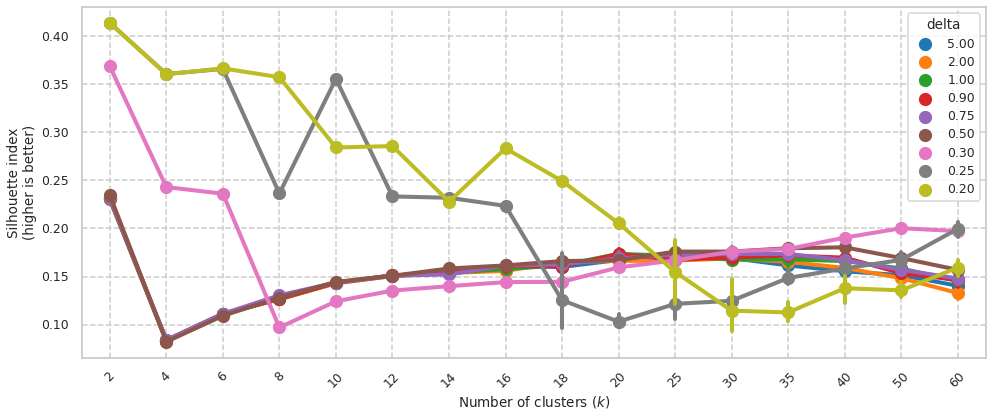

In [36]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="si_score", hue="delta")
    ax.set_ylabel("Silhouette index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

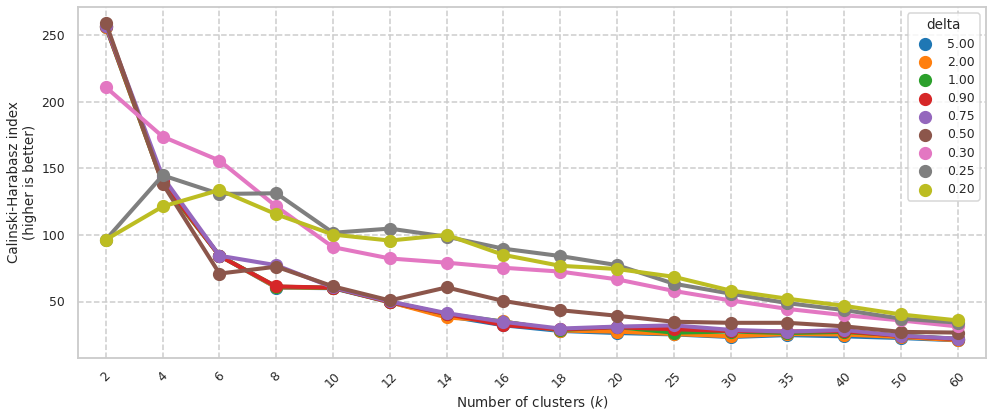

In [37]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score", hue="delta")
    ax.set_ylabel("Calinski-Harabasz index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

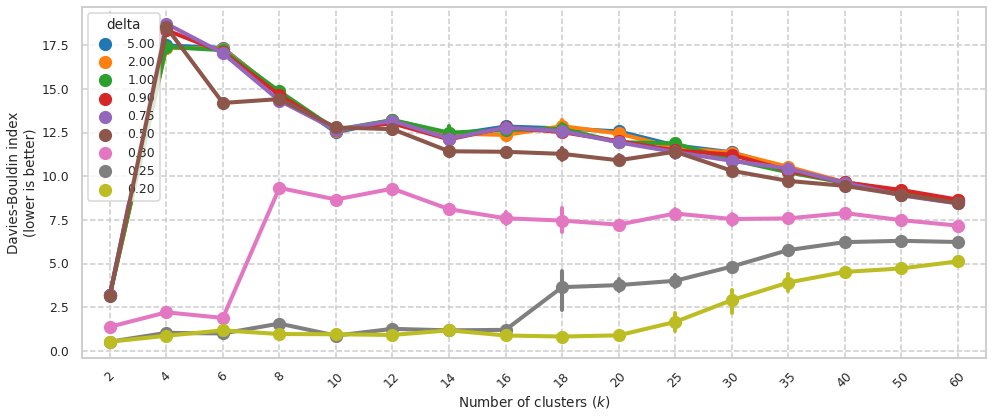

In [38]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="db_score", hue="delta")
    ax.set_ylabel("Davies-Bouldin index\n(lower is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()